# Koneksi ke API

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
client_id = "Input your client ID"
client_secret = "Input your clien secret"

In [3]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Menentukan data yang akan diambil berdasarkan nama "Artis"

In [4]:
artist = ['Zach Bryan', 'Taylor Swift', 'Bad Bunny', 'Beyoncé', 'Lizzy McAlpine', 'Noah Kahan', 'Lil Uzi Vert']
print(artist)

['Zach Bryan', 'Taylor Swift', 'Bad Bunny', 'Beyoncé', 'Lizzy McAlpine', 'Noah Kahan', 'Lil Uzi Vert']


# Menentukan Atribute yang akan dipanggil

In [5]:
def get_features(tr_id):
    meta = sp.track(tr_id)
    features = sp.audio_features(tr_id)

    # atribut sp.track
    name = meta['name'] # nama musik
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date'] # release data berdasarkan album
    length = meta['duration_ms']
    popularity = meta['popularity']

    # atribute sp.feature
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity,
              acousticness, danceability, energy, instrumentalness,
              liveness, loudness, speechiness, tempo, time_signature]
    return track

# Tarik data

In [6]:
import pandas as pd
import numpy as np

In [7]:
def get_songs():
    tracks = []
    for i in artist :
        song = sp.search(i, type='track', limit=50)
        for j in range(50):
            tr_id = song['tracks']['items'][j]['id']
            track = get_features(tr_id)
            tracks.append(track)
    
    df = pd.DataFrame(tracks, columns=['name', 'album', 'artist', 'release_date', 'length', 'popularity',
                                        'acousticness', 'danceability', 'energy', 'instrumentalness',
                                        'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
    
    return df

In [8]:
df = get_songs()
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Something in the Orange,Something in the Orange,Zach Bryan,2022-04-22,228013,89,0.555000,0.369,0.192,0.000008,0.0954,-12.151,0.0400,175.212,3
1,Heading South,Heading South,Zach Bryan,2019-09-30,171692,85,0.783000,0.680,0.246,0.000000,0.1060,-14.112,0.0580,110.230,4
2,Oklahoma Smokeshow,Summertime Blues,Zach Bryan,2022-07-15,211739,82,0.095800,0.544,0.573,0.000000,0.1040,-5.694,0.0356,122.977,4
3,Sun to Me,American Heartbreak,Zach Bryan,2022-05-20,163031,83,0.593000,0.505,0.270,0.000000,0.1330,-9.165,0.0333,98.721,4
4,Dawns (feat. Maggie Rogers),Dawns (feat. Maggie Rogers),Zach Bryan,2023-01-27,290892,83,0.874000,0.447,0.441,0.000044,0.1880,-7.658,0.0456,122.811,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Venetia,Eternal Atake,Lil Uzi Vert,2020-03-06,188800,62,0.162000,0.775,0.757,0.000000,0.1480,-4.139,0.1750,142.933,4
346,Big tonka (feat. Lil Uzi Vert),2 Alivë (Geëk Pack),Yeat,2022-04-01,207760,70,0.006520,0.667,0.670,0.000000,0.1220,-7.081,0.1240,130.082,4
347,Patience (feat. Don Toliver),Pink Tape,Lil Uzi Vert,2023-06-29,262429,55,0.050200,0.645,0.732,0.000001,0.1610,-2.940,0.0306,106.963,4
348,CS,Pink Tape,Lil Uzi Vert,2023-06-30,212040,68,0.000174,0.418,0.758,0.001070,0.1300,-5.914,0.0407,127.907,4


# Cek Data (EDA)

In [9]:
# eksport to excel

df.to_excel(r'top_artist_2022.xlsx', index=False)

In [10]:
df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Something in the Orange,Something in the Orange,Zach Bryan,2022-04-22,228013,89,0.5550,0.369,0.192,0.000008,0.0954,-12.151,0.0400,175.212,3
1,Heading South,Heading South,Zach Bryan,2019-09-30,171692,85,0.7830,0.680,0.246,0.000000,0.1060,-14.112,0.0580,110.230,4
2,Oklahoma Smokeshow,Summertime Blues,Zach Bryan,2022-07-15,211739,82,0.0958,0.544,0.573,0.000000,0.1040,-5.694,0.0356,122.977,4
3,Sun to Me,American Heartbreak,Zach Bryan,2022-05-20,163031,83,0.5930,0.505,0.270,0.000000,0.1330,-9.165,0.0333,98.721,4
4,Dawns (feat. Maggie Rogers),Dawns (feat. Maggie Rogers),Zach Bryan,2023-01-27,290892,83,0.8740,0.447,0.441,0.000044,0.1880,-7.658,0.0456,122.811,4


In [11]:
df.tail()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
345,Venetia,Eternal Atake,Lil Uzi Vert,2020-03-06,188800,62,0.162000,0.775,0.757,0.000000,0.148,-4.139,0.1750,142.933,4
346,Big tonka (feat. Lil Uzi Vert),2 Alivë (Geëk Pack),Yeat,2022-04-01,207760,70,0.006520,0.667,0.670,0.000000,0.122,-7.081,0.1240,130.082,4
347,Patience (feat. Don Toliver),Pink Tape,Lil Uzi Vert,2023-06-29,262429,55,0.050200,0.645,0.732,0.000001,0.161,-2.940,0.0306,106.963,4
348,CS,Pink Tape,Lil Uzi Vert,2023-06-30,212040,68,0.000174,0.418,0.758,0.001070,0.130,-5.914,0.0407,127.907,4
349,Commercial (feat. Lil Uzi Vert),My Turn,Lil Baby,2020-02-28,214214,66,0.048000,0.892,0.486,0.000000,0.146,-8.637,0.3840,120.998,4


In [12]:
# Mendeteksi baris dengan semua nilai NaN
all_nan_rows = df[df.isna().all(axis=1)]

print(all_nan_rows)

Empty DataFrame
Columns: [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
Index: []


In [13]:
df.sort_values(by=['popularity'], ascending=False)[['name', 'artist']].head(10)

,name,artist
50,Cruel Summer,Taylor Swift
100,WHERE SHE GOES,Bad Bunny
102,un x100to,Grupo Frontera
56,Anti-Hero,Taylor Swift
107,MOJABI GHOST,Tainy
105,K-POP,Travis Scott
62,august,Taylor Swift
53,I Can See You (Taylor’s Version) (From The Vault),Taylor Swift
72,cardigan,Taylor Swift
69,Lover,Taylor Swift


In [14]:
df.sort_values(by=['popularity'],ascending=False)[['name', 'album', 'artist']].head()

,name,album,artist
50,Cruel Summer,Lover,Taylor Swift
100,WHERE SHE GOES,WHERE SHE GOES,Bad Bunny
102,un x100to,un x100to,Grupo Frontera
56,Anti-Hero,Midnights,Taylor Swift
107,MOJABI GHOST,DATA,Tainy


# Visualisasi

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

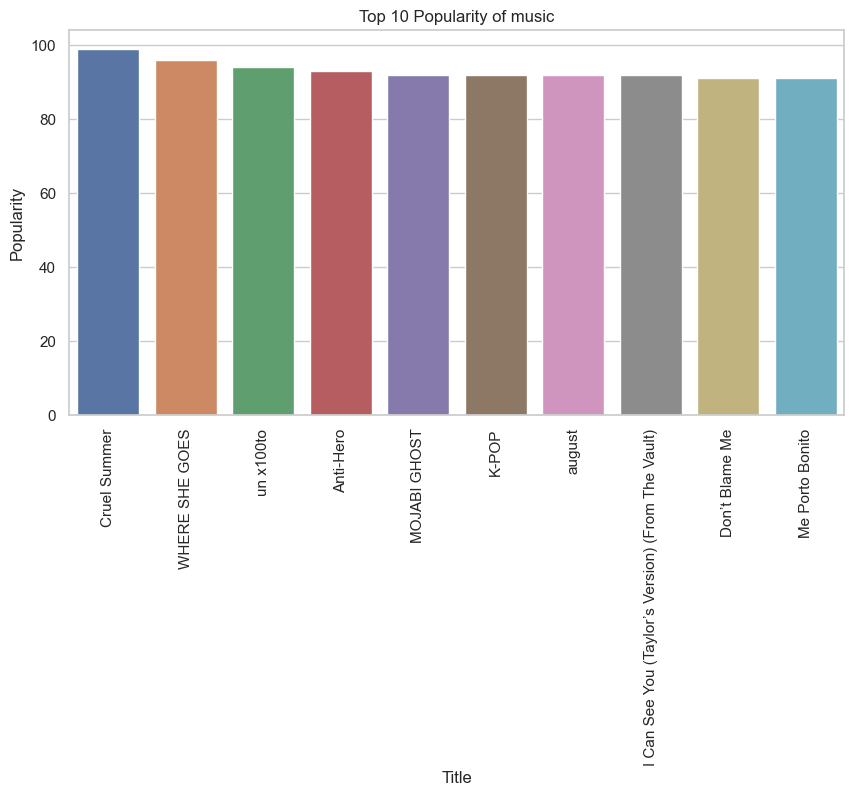

In [16]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)

ax = sns.barplot(x=x.index, y=x)
ax.set_title("Top 10 Popularity of music")
ax.set_ylabel('Popularity')
ax.set_xlabel('Title')

plt.xticks(rotation=90)
plt.show()

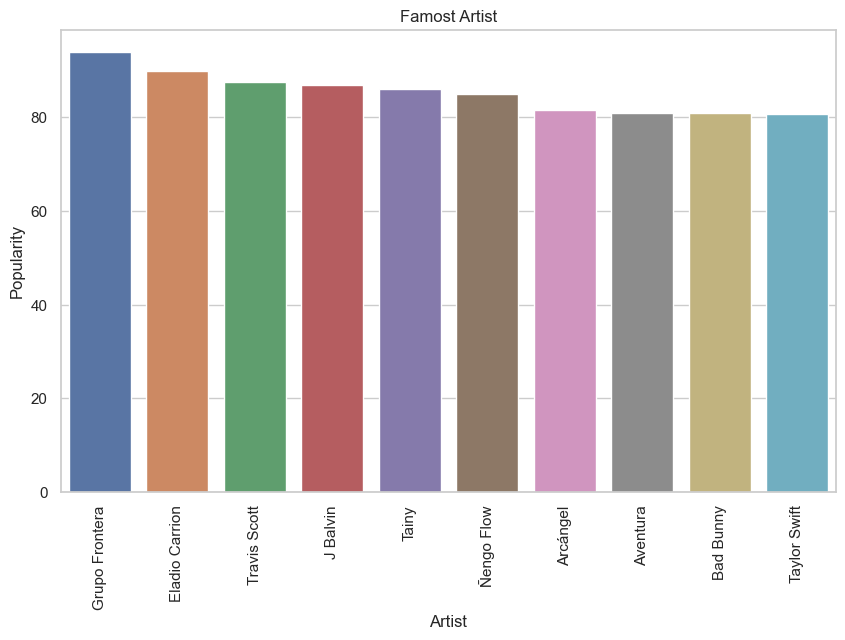

In [17]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

x = df.groupby("artist")["popularity"].mean().sort_values(ascending=False).head(10)

ax = sns.barplot(x=x.index, y=x)
ax.set_title('Famost Artist')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artist')

plt.xticks(rotation=90)
plt.show()

<Figure size 1000x800 with 0 Axes>

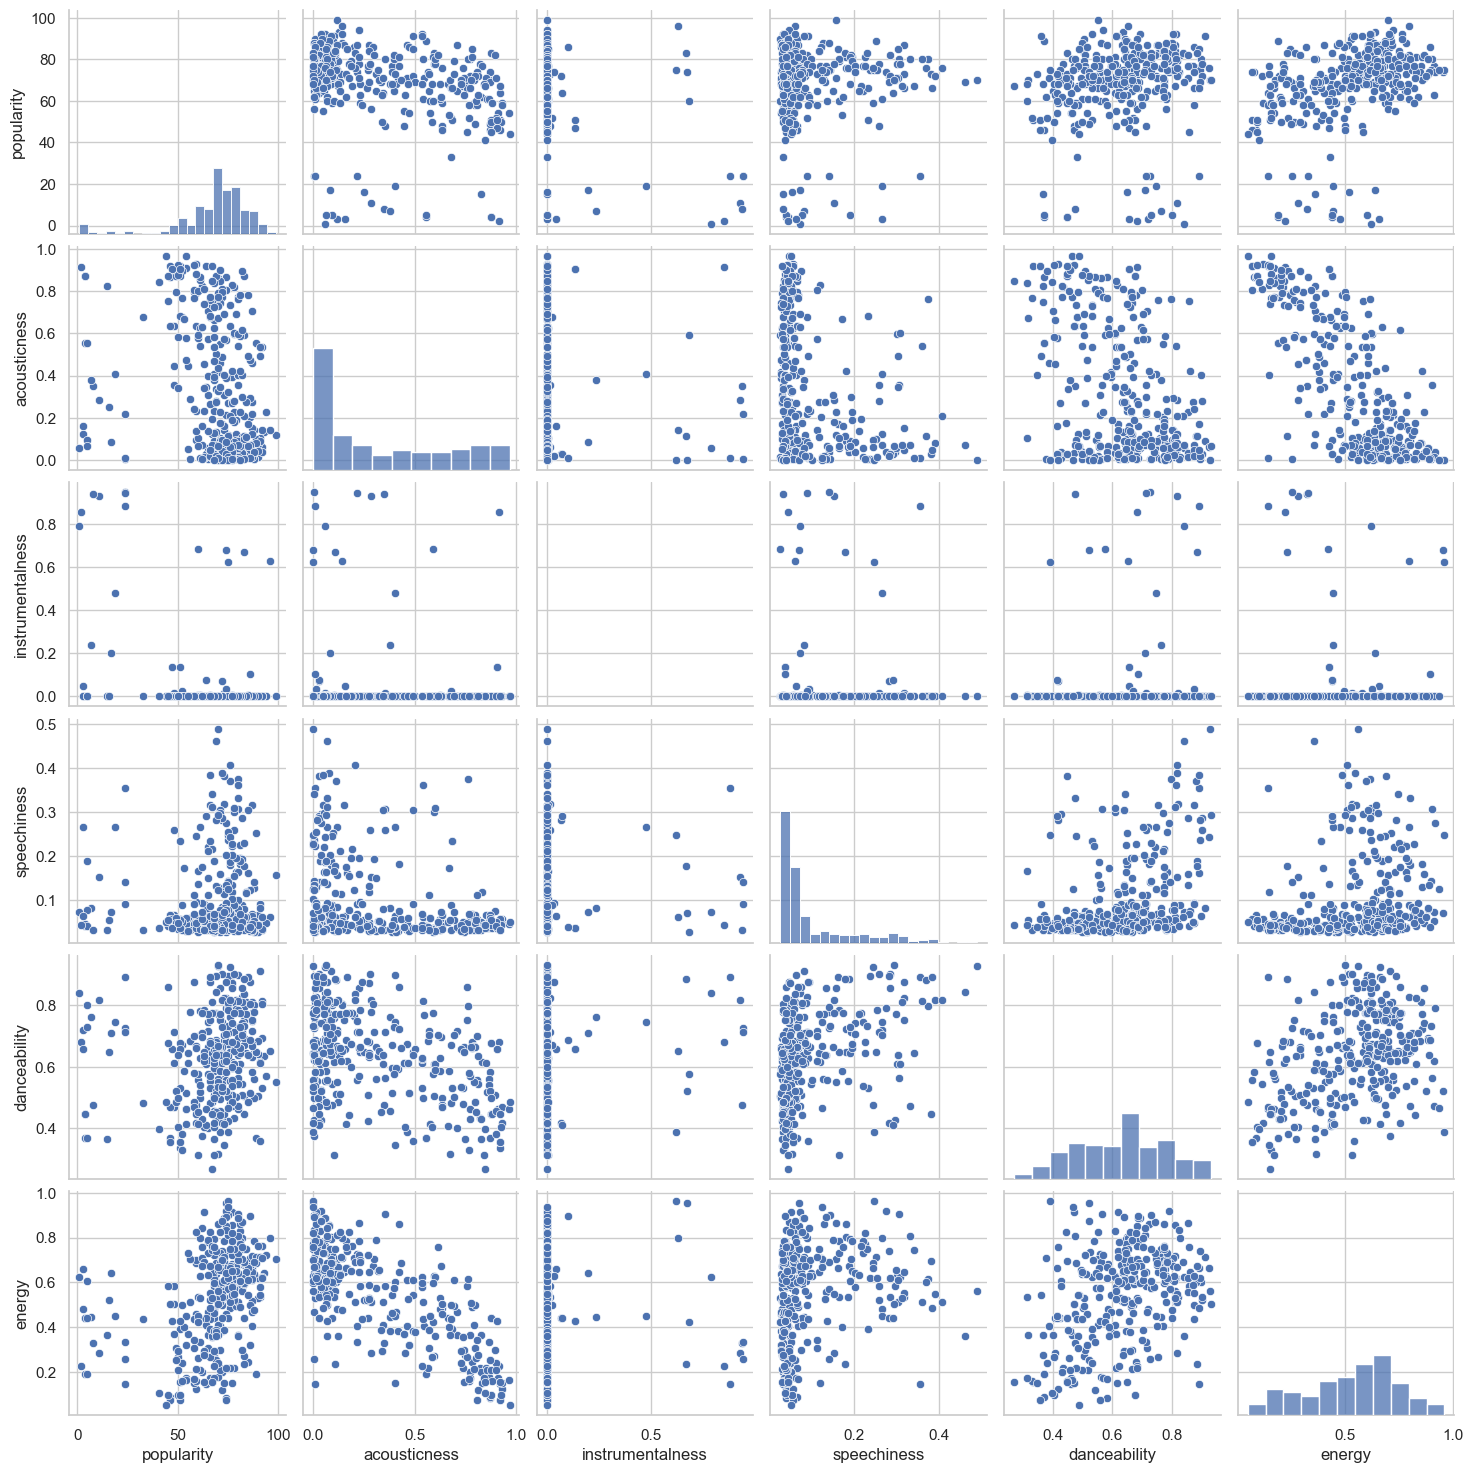

In [18]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")

cols = ["popularity", "acousticness", "instrumentalness", "speechiness",
        "danceability", "energy"]
sns.pairplot(df[cols], height=2.5)
plt.show()


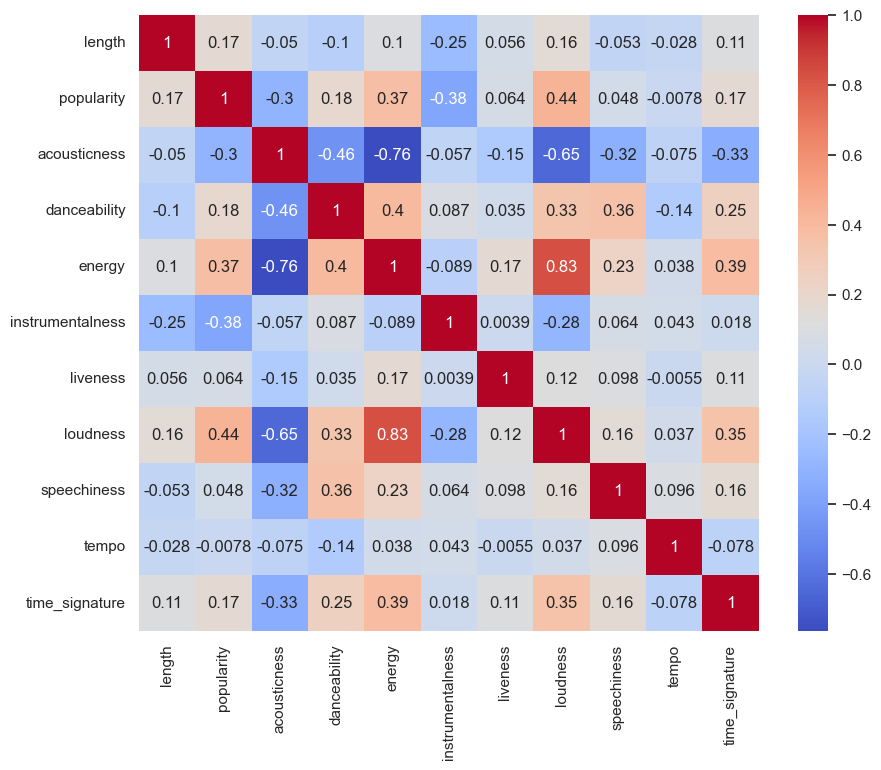

In [19]:
# Pilih hanya kolom numerik dari DataFrame
numeric_columns = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Preprocesing

In [20]:
# kolom ini dihilangkan karena tidak diperlukan.
df2 = df.drop(['release_date', 'name', 'album', 'artist', 'popularity'], axis=1)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   length            350 non-null    int64  
 1   acousticness      350 non-null    float64
 2   danceability      350 non-null    float64
 3   energy            350 non-null    float64
 4   instrumentalness  350 non-null    float64
 5   liveness          350 non-null    float64
 6   loudness          350 non-null    float64
 7   speechiness       350 non-null    float64
 8   tempo             350 non-null    float64
 9   time_signature    350 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 27.5 KB


In [22]:
df2.head(5)

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,228013,0.5550,0.369,0.192,0.000008,0.0954,-12.151,0.0400,175.212,3
1,171692,0.7830,0.680,0.246,0.000000,0.1060,-14.112,0.0580,110.230,4
2,211739,0.0958,0.544,0.573,0.000000,0.1040,-5.694,0.0356,122.977,4
3,163031,0.5930,0.505,0.270,0.000000,0.1330,-9.165,0.0333,98.721,4
4,290892,0.8740,0.447,0.441,0.000044,0.1880,-7.658,0.0456,122.811,4


## Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df2.head()

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0.172652,0.699621,-1.768273,-1.604374,-0.213902,-0.658229,-1.169251,-0.636594,1.657002,-2.315499
1,-0.919783,1.424361,0.339996,-1.350245,-0.213958,-0.576021,-1.734527,-0.442241,-0.459602,0.282016
2,-0.143008,-0.760029,-0.581948,0.188647,-0.213958,-0.591532,0.692039,-0.684102,-0.044405,0.282016
3,-1.087777,0.820411,-0.846329,-1.237299,-0.213958,-0.366624,-0.308509,-0.708936,-0.834476,0.282016
4,1.392290,1.713621,-1.239511,-0.432557,-0.213667,0.059928,0.125898,-0.576129,-0.049812,0.282016


## Modeling K-Means

In [25]:
from sklearn.cluster import KMeans

In [26]:
wck=[]
for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=1000, random_state=42)
    model.fit(df2)
    wck.append(model.inertia_)

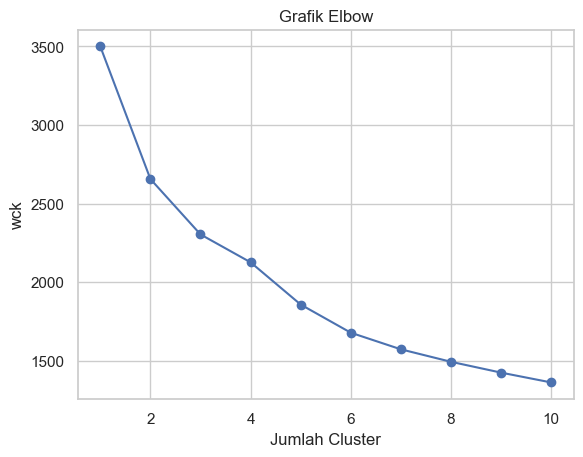

In [27]:
# diagram elbow

plt.plot(range(1,11),wck, marker='o')
plt.title('Grafik Elbow')

plt.xlabel('Jumlah Cluster')
plt.ylabel('wck')

plt.show()

In [34]:
kmeans = KMeans(n_clusters=4, 
                init='k-means++', 
                max_iter=500, 
                n_init=10, 
                random_state=0)

y_kmeans = kmeans.fit_predict(df2)

In [35]:
df['cluster'] = y_kmeans
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Something in the Orange,Something in the Orange,Zach Bryan,2022-04-22,228013,89,0.555000,0.369,0.192,0.000008,0.0954,-12.151,0.0400,175.212,3,3
1,Heading South,Heading South,Zach Bryan,2019-09-30,171692,85,0.783000,0.680,0.246,0.000000,0.1060,-14.112,0.0580,110.230,4,3
2,Oklahoma Smokeshow,Summertime Blues,Zach Bryan,2022-07-15,211739,82,0.095800,0.544,0.573,0.000000,0.1040,-5.694,0.0356,122.977,4,0
3,Sun to Me,American Heartbreak,Zach Bryan,2022-05-20,163031,83,0.593000,0.505,0.270,0.000000,0.1330,-9.165,0.0333,98.721,4,3
4,Dawns (feat. Maggie Rogers),Dawns (feat. Maggie Rogers),Zach Bryan,2023-01-27,290892,83,0.874000,0.447,0.441,0.000044,0.1880,-7.658,0.0456,122.811,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Venetia,Eternal Atake,Lil Uzi Vert,2020-03-06,188800,62,0.162000,0.775,0.757,0.000000,0.1480,-4.139,0.1750,142.933,4,2
346,Big tonka (feat. Lil Uzi Vert),2 Alivë (Geëk Pack),Yeat,2022-04-01,207760,70,0.006520,0.667,0.670,0.000000,0.1220,-7.081,0.1240,130.082,4,0
347,Patience (feat. Don Toliver),Pink Tape,Lil Uzi Vert,2023-06-29,262429,55,0.050200,0.645,0.732,0.000001,0.1610,-2.940,0.0306,106.963,4,0
348,CS,Pink Tape,Lil Uzi Vert,2023-06-30,212040,68,0.000174,0.418,0.758,0.001070,0.1300,-5.914,0.0407,127.907,4,0


In [30]:
df.to_excel(r'Hasil_cluster_1.xlsx', index=False)

In [42]:
cluster_0_numeric = cluster_0.select_dtypes(include=['number'])
cluster_1_numeric = cluster_1.select_dtypes(include=['number'])
cluster_2_numeric = cluster_2.select_dtypes(include=['number'])
cluster_3_numeric = cluster_3.select_dtypes(include=['number'])

In [43]:
df.cluster.value_counts()

cluster
0    150
3    103
2     84
1     13
Name: count, dtype: int64

## Melihat karakter dari setiap cluster

Analisa : 

* Energi Tinggi = Alternatif
* Accousticness & Energi Tinggi = Pop
* Instrumentalness Tinggi = New age
* Dancebility Tinggi & Speechinees = Rap n RnB

In [49]:
df_result = pd.DataFrame(cluster_0_numeric.mean(), columns=['Cluster 0'])
df_result.insert(1, "Cluster 1", cluster_1_numeric.mean())
df_result.insert(2, "Cluster 2", cluster_2_numeric.mean())
df_result.insert(3, "Cluster 3", cluster_3_numeric.mean())

In [50]:
df_result

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
length,222613.766667,162380.000000,222564.261905,218356.689320
popularity,73.220000,38.538462,72.928571,59.932039
acousticness,0.186059,0.237936,0.131032,0.730165
danceability,0.660967,0.686462,0.719345,0.504388
energy,0.637807,0.462769,0.666357,0.280184
instrumentalness,0.004560,0.772154,0.002284,0.002841
liveness,0.140348,0.183815,0.278713,0.157687
loudness,-6.422413,-12.487769,-6.159345,-11.554126
speechiness,0.061627,0.133854,0.219861,0.050319
tempo,122.069713,131.652000,125.592702,125.702699


Cluster 0 = Dance + Energy (POP)
Cluster 1 = Instrumentalness + danceability (New Age)
Cluster 2 = Energi tinggi + Dancebality + Speecheness (RAP)
Cluster 3 = Accousticness Tinggi, Energy Rendah (Alternative)

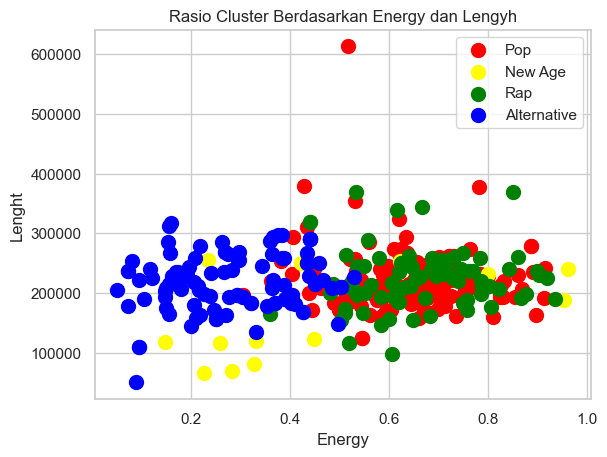

In [52]:
# melakukan visualisasi

plt.scatter(cluster_0_numeric['energy'], cluster_0_numeric['length'], s=100, c='red', label='Pop')
plt.scatter(cluster_1_numeric['energy'], cluster_1_numeric['length'], s=100, c='yellow', label='New Age')
plt.scatter(cluster_2_numeric['energy'], cluster_2_numeric['length'], s=100, c='green', label='Rap')
plt.scatter(cluster_3_numeric['energy'], cluster_3_numeric['length'], s=100, c='blue', label='Alternative')
            
plt.title('Rasio Cluster Berdasarkan Energy dan Lengyh')
plt.xlabel('Energy')
plt.ylabel('Lenght')
plt.legend()

plt.show()

In [54]:
cluster_3

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Something in the Orange,Something in the Orange,Zach Bryan,2022-04-22,228013,89,0.555,0.369,0.192,0.000008,0.0954,-12.151,0.0400,175.212,3,3
1,Heading South,Heading South,Zach Bryan,2019-09-30,171692,85,0.783,0.680,0.246,0.000000,0.1060,-14.112,0.0580,110.230,4,3
3,Sun to Me,American Heartbreak,Zach Bryan,2022-05-20,163031,83,0.593,0.505,0.270,0.000000,0.1330,-9.165,0.0333,98.721,4,3
4,Dawns (feat. Maggie Rogers),Dawns (feat. Maggie Rogers),Zach Bryan,2023-01-27,290892,83,0.874,0.447,0.441,0.000044,0.1880,-7.658,0.0456,122.811,4,3
5,Revival,Elisabeth,Zach Bryan,2020-05-08,221250,80,0.772,0.464,0.366,0.000016,0.0949,-9.025,0.0470,78.846,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Come Over,Stick Season (We'll All Be Here Forever),Noah Kahan,2023-06-09,197821,68,0.536,0.624,0.227,0.000000,0.2510,-10.731,0.0365,150.004,3,3
291,Halloween,Stick Season,Noah Kahan,2022-10-14,235690,58,0.767,0.581,0.169,0.000000,0.1260,-13.449,0.0675,160.156,3,3
292,The View Between Villages,Stick Season,Noah Kahan,2022-10-14,215341,68,0.840,0.313,0.172,0.000077,0.0718,-13.905,0.0443,153.069,4,3
295,The View Between Villages,Stick Season (We'll All Be Here Forever),Noah Kahan,2023-06-09,215341,67,0.848,0.268,0.155,0.000176,0.0707,-14.039,0.0439,76.643,4,3
